## **Notebook PC#05**
## Convolutional classifier for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Gabriel Toffanetto França da Rocha - 289320 <br>
**Aluno(a):** Maria Fernanda Paulino Gomes - 206745 <br>


In [1]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN_MNIST.h5")
print("Model saved to disk")
os.getcwd()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 158s 83ms/step - loss: 0.1954 - accuracy: 0.9419
Epoch 2/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0835 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 143s 77ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0530 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0439 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0401 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0359 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0281 - accurac

'/content'

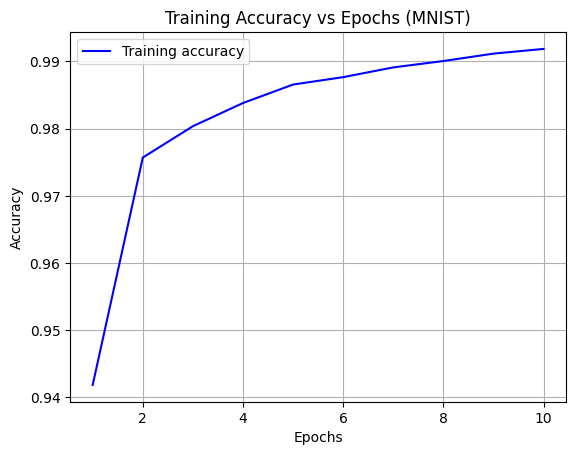

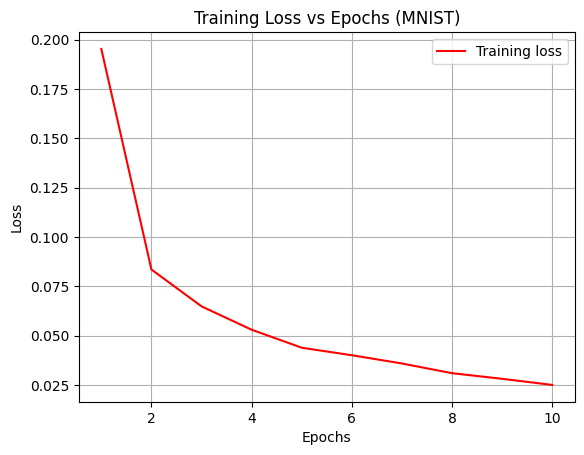

In [2]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [3]:
import tensorflow as tf
import os

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model1.to_json()
json_file = open("model_CNN_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model1.save_weights("model_CNN_CIFAR10.h5")
print("Model saved to disk")
os.getcwd()

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.5500 - accuracy: 0.4403
Epoch 2/10
1563/1563 [==============================] - 165s 106ms/step - loss: 1.2329 - accuracy: 0.5634
Epoch 3/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.1095 - accuracy: 0.6076
Epoch 4/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.0176 - accuracy: 0.6399
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9578 - accuracy: 0.6597
Epoch 6/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.8924 - accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8495 - accuracy: 0.6968
Epoch 8/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.8031 - accuracy: 0.7119
Epoch 9/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.756

'/content'

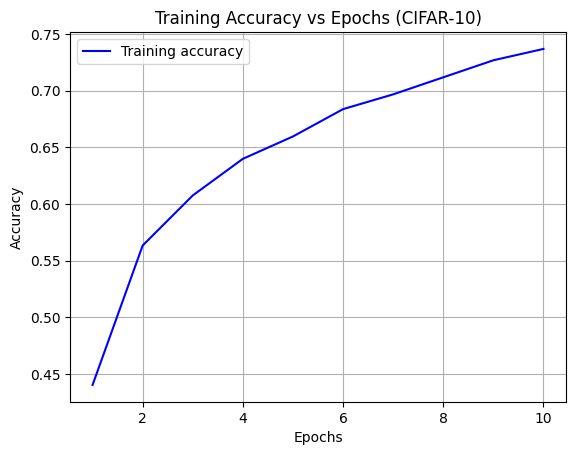

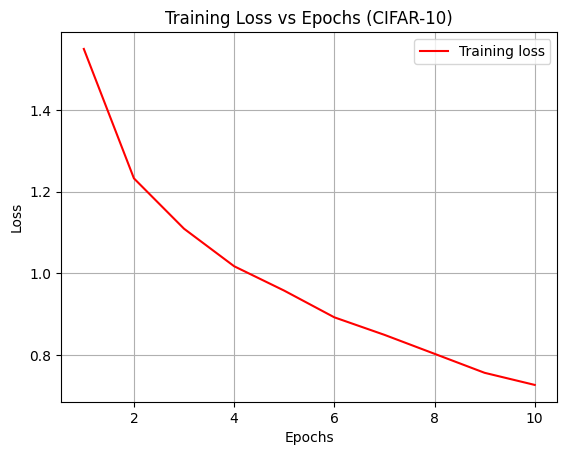

In [4]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [5]:
# Summary of the obtained results for the MNIST database
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.8624))
print('| %s: \t\t\t%f |'% (classifier2,0.9443))
print('| %s: \t\t\t%f |'% (classifier3,0.98))
print('| %s: \t\t\t%f |'% (classifier4,0.9929))
print('--------------------------------------------------')

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.862400 |
| ELM              : 			0.944300 |
| MLP              : 			0.980000 |
| CNN              : 			0.992900 |
--------------------------------------------------


In [6]:
# Summary of the obtained results for the CIFAR10 database
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.4078))
print('| %s: \t\t\t%f |'% (classifier2,0.4694))
print('| %s: \t\t\t%f |'% (classifier3,0.4927))
print('| %s: \t\t\t%f |'% (classifier4,0.6981))
print('--------------------------------------------------')

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.407800 |
| ELM              : 			0.469400 |
| MLP              : 			0.492700 |
| CNN              : 			0.698100 |
--------------------------------------------------
